In [38]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pickle
import numpy as np
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

In [42]:
train_data_df = pd.read_excel('data/time_series_375_prerpocess_en.xlsx', encoding='gbk', index_col=[0])
print(train_data_df.shape)

(6120, 80)


In [43]:
# all features name
columns=train_data_df.columns.values.tolist()[6:]
for i in columns:
    print('  '+i+'\n',end="")

  Hypersensitive cardiac troponinI
  hemoglobin
  Serum chloride
  Prothrombin time
  procalcitonin
  eosinophils(%)
  Interleukin 2 receptor
  Alkaline phosphatase
  albumin
  basophil(%)
  Interleukin 10
  Total bilirubin
  Platelet count
  monocytes(%)
  antithrombin
  Interleukin 8
  indirect bilirubin
  Red blood cell distribution width 
  neutrophils(%)
  total protein
  Quantification of Treponema pallidum antibodies
  Prothrombin activity
  HBsAg
  mean corpuscular volume
  hematocrit
  White blood cell count
  Tumor necrosis factorα
  mean corpuscular hemoglobin concentration
  fibrinogen
  Interleukin 1β
  Urea
  lymphocyte count
  PH value
  Red blood cell count
  Eosinophil count
  Corrected calcium
  Serum potassium
  glucose
  neutrophils count
  Direct bilirubin
  Mean platelet volume
  ferritin
  RBC distribution width SD
  Thrombin time
  (%)lymphocyte
  HCV antibody quantification
  D-D dimer
  Total cholesterol
  aspartate aminotransferase
  Uric acid
  HCO3-
  calci

In [44]:
# range of last test values
df = train_data_df.interpolate(method='linear').ffill().bfill() 
grouped=df.groupby(by=['PATIENT_ID'])
patient_last_value=grouped.last()
range=[]
for i in columns:
    range.append([patient_last_value[i].min(),patient_last_value[i].max(),patient_last_value[i].mean()])

In [27]:
for i in range:
    print(str(round(i[2],2))+' ('+str(round(i[0],2))+', '+str(round(i[1],2))+')')

747.76 (1.9, 43905.19)
124.89 (6.4, 178.0)
102.73 (77.7, 138.2)
16.01 (11.69, 84.22)
0.99 (0.02, 49.34)
0.56 (0.0, 5.61)
961.52 (61.0, 5608.04)
84.86 (37.18, 481.5)
33.06 (19.1, 45.07)
0.21 (0.0, 1.38)
12.5 (5.0, 500.0)
16.28 (2.95, 276.0)
187.78 (1.2, 472.5)
6.66 (0.62, 31.62)
87.57 (20.0, 136.0)
88.08 (5.0, 6385.85)
6.85 (1.0, 79.3)
12.94 (10.91, 22.91)
76.09 (15.9, 98.1)
66.06 (36.7, 79.33)
0.17 (0.02, 8.74)
80.97 (16.3, 136.64)
10.35 (0.0, 250.0)
89.75 (62.3, 110.73)
37.0 (19.9, 51.3)
15.18 (0.8, 1726.6)
12.07 (4.0, 168.0)
344.17 (286.0, 464.33)
4.38 (0.5, 8.89)
6.56 (5.0, 79.44)
9.74 (2.17, 68.4)
1.06 (0.13, 35.53)
6.47 (5.0, 7.54)
7.58 (0.1, 749.5)
0.03 (0.0, 0.33)
2.34 (1.78, 2.67)
4.45 (3.1, 9.86)
8.37 (2.43, 32.37)
7.03 (0.85, 31.43)
9.5 (1.7, 216.3)
10.89 (9.04, 14.0)
1634.37 (26.8, 42402.91)
41.78 (32.5, 83.3)
18.17 (13.0, 133.67)
16.45 (0.6, 54.83)
0.13 (0.03, 1.85)
6.2 (0.21, 29.82)
3.66 (0.66, 6.11)
56.53 (8.0, 1858.0)
297.47 (57.0, 1001.0)
22.59 (6.3, 29.7)
2.1 (1.35, 2.

In [14]:
grouped.last()

,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2020-02-17 08:31:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,17.185714,134.200000,99.975000,12.716667,0.090000,0.340000,1152.000000,61.500000,37.025000,0.120000,35.900000,7.000000,260.200000,4.140000,84.000000,29.600000,4.000000,12.060000,84.220000,68.400000,0.056071,110.333333,0.011786,91.400000,38.320000,7.902000,12.300000,350.600000,3.563333,5.000000,6.400000,0.948000,6.000000,4.194000,0.032000,2.452500,5.057500,6.390000,6.566000,3.000000,10.580000,830.011111,40.140000,16.416667,11.180000,0.084286,0.926667,4.522500,36.500000,326.500000,26.425000,2.252500,157.590909,339.000000,29.380000,68.240000,4.000000,0.344000,12.380000,31.375000,41.000000,0.948333,0.012000,-1.0,31.980000,39.466667,16.771429,0.093148,141.575000,0.272000,40.307692,32.000000,76.350000,88.000000
2,2020-02-17 15:34:00,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,2.673333,122.333333,98.266667,12.300000,0.066364,0.033333,526.714286,45.333333,36.816667,0.100000,7.842857,12.333333,207.000000,5.833333,84.000000,17.785714,7.216667,12.900000,78.233333,70.050000,0.066923,117.000000,0.006923,94.466667,36.666667,5.936667,9.971429,332.666667,3.770000,5.000000,3.400000,0.790000,6.357143,3.883333,0.003333,2.295000,4.590000,10.991429,4.790000,5.116667,10.866667,747.680000,44.300000,16.900000,15.800000,0.072308,0.440000,4.763333,17.500000,242.666667,24.800000,2.111667,54.571429,289.666667,31.800000,31.148571,4.000000,0.343333,12.633333,33.233333,45.166667,0.920000,0.010000,-1.0,31.466667,36.000000,39.639286,0.098519,137.116667,0.223333,63.739130,21.500000,91.700000,73.166667
3,2020-02-06 23:15:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,4.413333,98.000000,101.733333,15.850000,0.252000,1.033333,516.075000,68.000000,36.900000,0.166667,7.402500,13.566667,142.000000,4.566667,89.943396,20.707500,7.333333,11.444444,76.800000,67.233333,0.050000,72.333333,0.003333,110.733333,26.966667,6.553333,10.557500,365.666667,5.216792,7.565000,5.313333,1.200000,6.100000,2.526667,0.063333,2.326667,3.880000,6.581111,4.970000,6.233333,10.233333,421.958140,48.655556,16.501887,17.433333,0.060000,1.213333,3.833333,22.333333,230.733333,24.466667,2.220000,134.285714,263.333333,26.133333,37.398000,4.000000,0.310000,10.833333,30.333333,40.333333,1.248333,0.010000,-1.0,40.566667,37.686792,78.314286,0.106667,141.433333,0.143333,46.200000,51.333333,83.733333,69.666667
4,2020-02-17 08:31:00,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,5.333333,111.50000

In [126]:
# show one case
grouped=df.groupby(by=['PATIENT_ID'])
LDH=grouped.get_group(3)['Lactate dehydrogenase'].tolist()
hsCRP=grouped.get_group(3)['High sensitivity C-reactive protein'].tolist()
lymph=grouped.get_group(3)['(%)lymphocyte'].tolist()
time=grouped.get_group(3)['RE_DATE'].tolist()

In [71]:
otherStyleTime = [i.strftime("%Y--%m--%d %H:%M:%S") for i in time] 

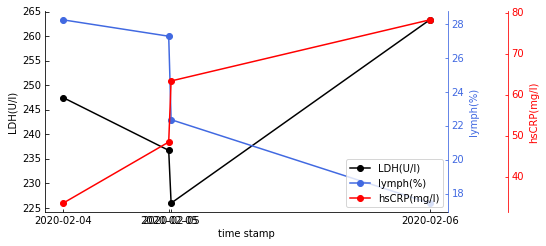

In [177]:
plt.figure(figsize=(8,4))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0.1, 0.1, 0.7, 0.7])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)

#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('LDH(U/l)')
ax_cof.set_xlabel('time stamp')
ax_temp.set_ylabel('lymph(%)')
ax_load.set_ylabel('hsCRP(mg/l)')

load_axisline = ax_load.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(60,0))

fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''

curve_cof, = ax_cof.plot(time[14:], LDH[14:],"-o",label="LDH(U/l)", color='black',linewidth =1.5)
curve_temp, = ax_temp.plot(time[14:], lymph[14:],"-o", label="lymph(%)", color='royalblue',linewidth =1.5)
curve_load, = ax_load.plot(time[14:], hsCRP[14:],"-o", label="hsCRP(mg/l)", color='red',linewidth =1.5)

# ax_temp.set_ylim(0,4)
# ax_load.set_ylim(0,4)
# ax_cp.set_ylim(0,50)
# ax_wear.set_ylim(0,30)


#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('royalblue')
ax_load.axis['right2'].label.set_color('red')

ax_temp.axis['right'].major_ticks.set_color('royalblue')
ax_load.axis['right2'].major_ticks.set_color('red')

ax_temp.axis['right'].major_ticklabels.set_color('royalblue')
ax_load.axis['right2'].major_ticklabels.set_color('red')

ax_temp.axis['right'].line.set_color('royalblue')
ax_load.axis['right2'].line.set_color('red')

plt.xticks(time[14:],rotation=60)
plt.legend(loc='lower right')
plt.savefig('case3.jpg', dpi=300)

plt.show()

In [179]:
time

[Timestamp('2020-01-23 14:31:00'),
 Timestamp('2020-01-23 14:43:00'),
 Timestamp('2020-01-23 14:55:00'),
 Timestamp('2020-01-23 15:00:00'),
 Timestamp('2020-01-23 15:12:00'),
 Timestamp('2020-01-23 15:31:00'),
 Timestamp('2020-01-23 15:39:00'),
 Timestamp('2020-01-23 15:40:00'),
 Timestamp('2020-01-23 15:59:00'),
 Timestamp('2020-01-30 12:14:00'),
 Timestamp('2020-01-30 12:55:00'),
 Timestamp('2020-01-30 12:58:00'),
 Timestamp('2020-01-30 13:06:00'),
 Timestamp('2020-01-30 14:09:00'),
 Timestamp('2020-02-04 15:17:00'),
 Timestamp('2020-02-05 07:24:00'),
 Timestamp('2020-02-05 07:46:00'),
 Timestamp('2020-02-06 23:15:00')]

In [180]:
grouped.get_group(3)

,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,Alkaline phosphatase,albumin,basophil(%),Interleukin 10,Total bilirubin,Platelet count,monocytes(%),antithrombin,Interleukin 8,indirect bilirubin,Red blood cell distribution width,neutrophils(%),total protein,Quantification of Treponema pallidum antibodies,Prothrombin activity,HBsAg,mean corpuscular volume,hematocrit,White blood cell count,Tumor necrosis factorα,mean corpuscular hemoglobin concentration,fibrinogen,Interleukin 1β,Urea,lymphocyte count,PH value,Red blood cell count,Eosinophil count,Corrected calcium,Serum potassium,glucose,neutrophils count,Direct bilirubin,Mean platelet volume,ferritin,RBC distribution width SD,Thrombin time,(%)lymphocyte,HCV antibody quantification,D-D dimer,Total cholesterol,aspartate aminotransferase,Uric acid,HCO3-,calcium,Amino-terminal brain natriuretic peptide precursor(NT-proBNP),Lactate dehydrogenase,platelet large cell ratio,Interleukin 6,Fibrin degradation products,monocytes count,PLT distribution width,globulin,γ-glutamyl transpeptidase,International standard ratio,basophil count(#),2019-nCoV nucleic acid detection,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2020-01-23 14:31:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,2.770000,109.000000,98.433333,12.733333,0.065455,0.000000,533.857143,45.666667,36.433333,0.000000,7.871429,11.366667,169.000000,5.900000,84.000000,18.242857,6.533333,12.800000,75.000000,69.700000,0.067308,109.333333,0.007308,94.600000,33.200000,3.720000,10.019048,328.000000,4.290000,5.000,3.300000,0.710000,6.342857,3.510000,0.000000,2.270000,4.34,10.662857,2.790000,4.833333,11.600000,702.560000,44.400000,16.833333,19.100000,0.070769,0.620000,4.466667,20.000000,224.333333,24.300000,2.103333,59.000000,297.333333,37.800000,33.000952,4.0,0.220000,13.900000,33.266667,40.333333,0.960000,0.000000,-1.0,31.100000,35.600000,40.171429,0.098704,136.833333,0.200000,64.869565,21.000000,88.800000,72.333333
3,2020-01-23 14:43:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,2.866667,109.333333,98.600000,13.166667,0.064545,0.022222,541.000000,46.000000,36.050000,0.022222,7.900000,10.400000,180.777778,5.955556,84.000000,18.700000,5.850000,12.777778,73.344444,69.350000,0.067692,101.666667,0.007692,94.488889,33.255556,3.896667,10.066667,328.444444,4.810000,5.000,3.200000,0.826667,6.328571,3.520000,0.001111,2.245000,4.09,10.334286,2.834444,4.550000,11.500000,657.440000,44.211111,16.766667,20.655556,0.069231,0.800000,4.170000,22.500000,206.000000,23.800000,2.095000,63.428571,305.000000,36.933333,34.853333,4.0,0.233333,13.744444,33.300000,35.500000,1.000000,0.001111,-1.0,31.100000,35.200000,40.703571,0.098889,136.550000,0.210000,66.000000,20.500000,85.900000,71.500000
3,2020-01-23 14:55:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,2.963333,109.666667,98.766667,13.600000,0.063636,0.044444,548.142857,46.333333,35.666667,0.044444,7.928571,9.433333,192.555556,6.011111,84.000000,19.157143,5.166667,12.755556,71.688889,69.000000,0.068077,94.000000,0.008077,94.377778,33.311111,4.073333,10.114286,328.888889,5.330000,5.000,3.100000,0.943333,6.314286,3.530000,0.002222,2.220000,3.84,10.005714,2.878889,4.266667,11.400000,612.320000,44.022222,16.700000,22.211111,0.067692,0.980000,3.873333,25.000000,187.666667,23.300000,2.086667,67.857143,312.666667,36.066667,36.705714,4.0,0.246667,13.588889,33.333333,30.666667,1.040000,0.002222,-1.0,31.100000,34.800000,41.235714,0.099074,136.266667,0.220000,62.916667,20.000000,83.000000,70.666667
3,2020-01-23 15:00:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,3.060000,110.000000,98.933333,13.750000,0.062727,0.066667

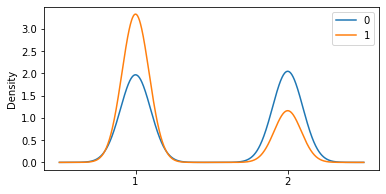

In [190]:
plt.xticks([1,2])
df.groupby('outcome')['gender'].plot(kind='kde',legend=True, figsize=(6,3))
plt.savefig('gender.jpg',dpi=300)

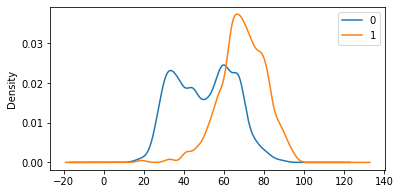

In [191]:
df.groupby('outcome')['age'].plot(kind='kde', legend=True, figsize=(6,3 ))
plt.savefig('age.jpg',dpi=300)

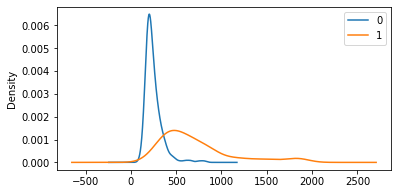

In [27]:
train_data_df.groupby('outcome')['Lactate dehydrogenase'].plot(kind='kde', legend=True, figsize=(6, 3))
plt.savefig('LDH.jpg',dpi=300)

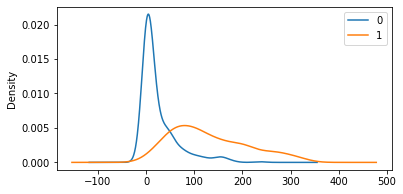

In [28]:
train_data_df.groupby('outcome')['High sensitivity C-reactive protein'].plot(kind='kde', legend=True, figsize=(6, 3))
plt.savefig('hs-CPD.jpg',dpi=300)

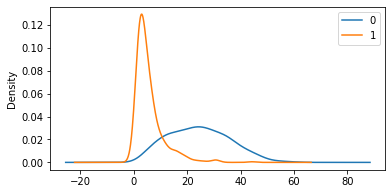

In [29]:
train_data_df.groupby('outcome')['(%)lymphocyte'].plot(kind='kde', legend=True, figsize=(6, 3))
plt.savefig('lymph.jpg',dpi=300)